<a href="https://colab.research.google.com/github/Anirudh-UG/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_excel("/content/Diabetes_Classification.xlsx")
df

,Cholesterol,Glucose,HDL Chol,Chol/HDL ratio,Age,Gender,BMI,Systolic BP,Diastolic BP,Waist/hip ratio,Diabetes
0,193,77,49,3.9,19,0,22.5,118,70,0.84,0
1,146,79,41,3.6,19,0,26.4,108,58,0.83,0
2,217,75,54,4.0,20,0,29.3,110,72,0.89,0
3,226,97,70,3.2,20,0,19.6,122,64,0.79,0
4,164,91,67,2.4,20,0,20.2,122,86,0.82,0
...,...,...,...,...,...,...,...,...,...,...,...
385,227,105,44,5.2,83,0,25.2,150,90,0.88,0
386,226,279,52,4.3,84,0,37.5,144,88,0.85,1
387,301,90,118,2.6,89,0,21.7,218,90,0.76,0
388,232,184,114,2.0,91,0,24.0,170,82,0.92,1


In [ ]:
df.isnull().sum()

Cholesterol        0
Glucose            0
HDL Chol           0
Chol/HDL ratio     0
Age                0
Gender             0
BMI                0
Systolic BP        0
Diastolic BP       0
Waist/hip ratio    0
Diabetes           0
dtype: int64

In [ ]:
X = df.drop("Diabetes",axis=1)
Y = pd.DataFrame(df["Diabetes"],columns = ['Diabetes'])


In [ ]:
#scaling the data between 0 to 1
scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_data = scaler.fit_transform(X)
scaled_testing_data = scaler.fit_transform(Y)
X_train,X_test,Y_train,Y_test = train_test_split(scaled_training_data,scaled_testing_data,random_state=42,test_size =0.30)

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(50,input_dim=10,activation = "relu"))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train,Y_train)

9/9 [==============================] - 1s 4ms/step - loss: 0.1205


In [ ]:
error_rate = model.evaluate(X_test,Y_test)


4/4 [==============================] - 0s 3ms/step - loss: 0.1524


In [ ]:
print((1-error_rate)*100)

84.75847095251083


In [ ]:
predictions = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


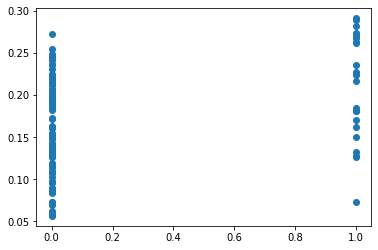

In [ ]:
#predictions vs actual values
plt.scatter(Y_test,predictions)